In [53]:
from wine_quality_v1.data_preparation.data_preparation import get_wine_dataset_uci
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [41]:
df, metadata = get_wine_dataset_uci()

C:\Users\manue\Documents\data_science-portafolio\classification\wine_quality_v1\wine_quality_v1\data_preparation\data_preparation.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = wine_quality.data.targets


In [42]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [43]:
# create binary target variable
df["quality_"] = df["quality"].apply(lambda x: 1 if x >= 5 else 0)

In [44]:
df["quality_"].value_counts()

quality_
1    6251
0     246
Name: count, dtype: int64

In [45]:
len(metadata["numerical_features"])

11

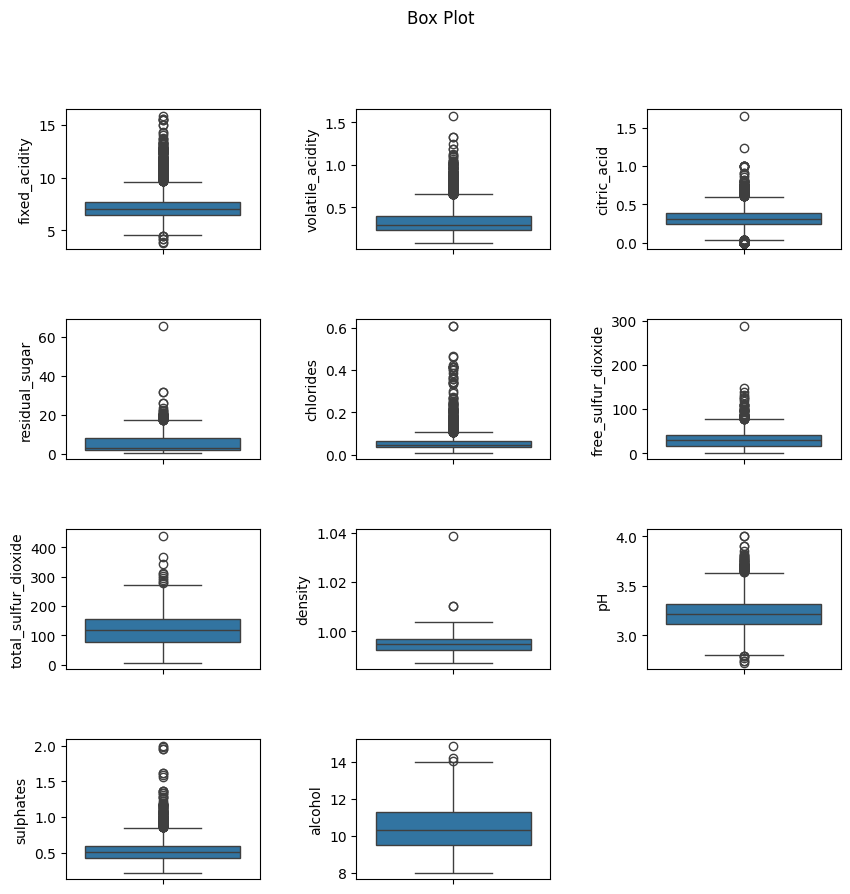

In [59]:
fig = plt.figure(figsize=(10, 10))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[2, 2, 2], wspace=0.5,
                         hspace=0.5, height_ratios=[1, 1, 1,1])
fig.suptitle('Box Plot')
 
for i, feature in enumerate(metadata["numerical_features"]):
    ax = fig.add_subplot(spec[i//3, i%3])
    sns.boxplot(ax=ax, data=df, y=feature)


In [60]:
def replace_outlier(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = df[feature].median()
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = median
    return df